<a href="https://colab.research.google.com/github/sgathai/dsc-phase-2-project-v2-3/blob/main/Copy_of_Kinya_KC_House_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
#Reading the csv file
df = pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
#General information about the dataset including the datatypes in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
#checking the shape of the dataframe
df.shape

(21597, 21)

In [ ]:
#Checking for the summary statistics of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#Checking for null values in the dataset
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
# Convert dates into datetime objects
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### **Exploring** **the** **Features**

Condition

In [ ]:
df['condition'].value_counts(sort=False)

3    14020
5     1701
4     5677
1       29
2      170
Name: condition, dtype: int64

In [ ]:
df['condition'].nunique()

5

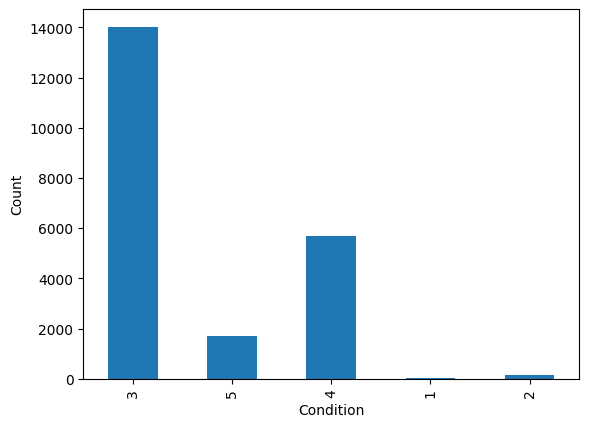

In [ ]:
df['condition'].value_counts(sort=False).plot.bar()
plt.xlabel('Condition')
plt.ylabel('Count')

# Displaying the plot
plt.show()


Basement

In [ ]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']


In [ ]:
df['sqft_basement'].describe()


count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [ ]:
#Create a new variable to make the basement binary. 0 if there's no basement and 1 otherwise
df['basement'] = [0 if x <= 0  else 1 for x in df['sqft_basement']]

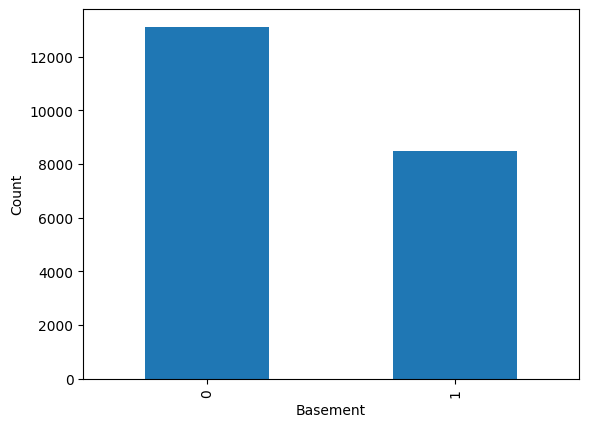

In [ ]:
df['basement'].value_counts().plot.bar()
plt.xlabel('Basement')
plt.ylabel('Count')
plt.show()

View

In [ ]:
df['view'].unique()


array([ 0., nan,  3.,  4.,  2.,  1.])

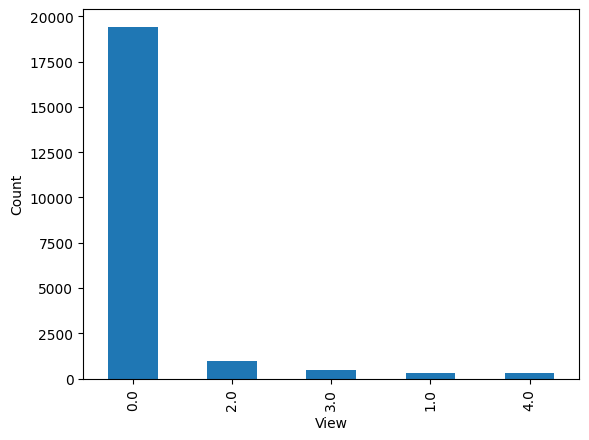

In [ ]:
df['view'].value_counts().plot.bar()
plt.xlabel('View')
plt.ylabel('Count')
plt.show()


In [ ]:
#Create a new variable called viewed and make it binary. 1 if the house has been viewed and 0 otherwise.
df['viewed'] = [0 if x == 0  else 1 for x in df['view']]
df['viewed'].value_counts()

0    19422
1     2175
Name: viewed, dtype: int64

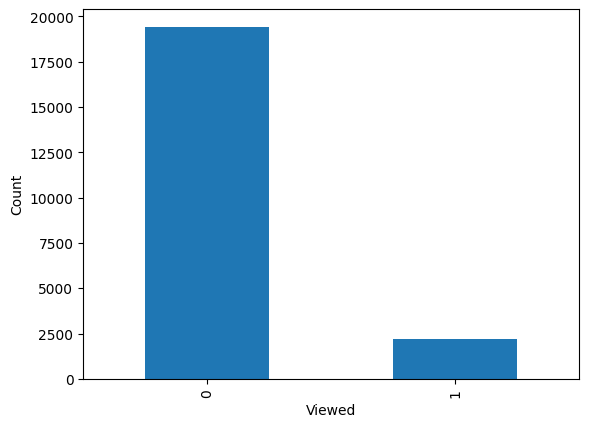

In [ ]:
df['viewed'].value_counts().plot.bar()
plt.xlabel('Viewed')
plt.ylabel('Count')
plt.show()

Waterfront

In [ ]:
df['waterfront'].isnull().sum()


2376

In [ ]:
df['waterfront'].value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [ ]:
#Replacing null values with 0s
df['waterfront'].fillna(0).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [ ]:
#Create a new variable to make the waterfront binary. 0 if there's no waterfront feature and 1 otherwise
df['waterfront'] = [0 if x == 0 else 1 for x in df['waterfront']]

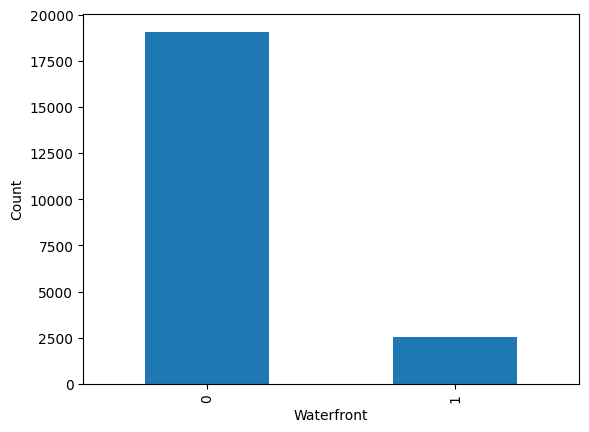

In [ ]:
df['waterfront'].value_counts().plot.bar()
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.show()

Zipcode

In [ ]:
df['zipcode'].head()


0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64

In [ ]:
df['zipcode'].nunique()


70

In [ ]:
df['zipcode'].unique()


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [ ]:
#Summary statistics for the modified dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,viewed
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.116775,0.233863,3.409825,...,291.725008,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.392971,0.100708
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.321160,0.765686,0.650546,...,442.667800,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.488422,0.300949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000


In [ ]:
#checking for null values again
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement            0
viewed              0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

### **Exploratory Data Analysis**

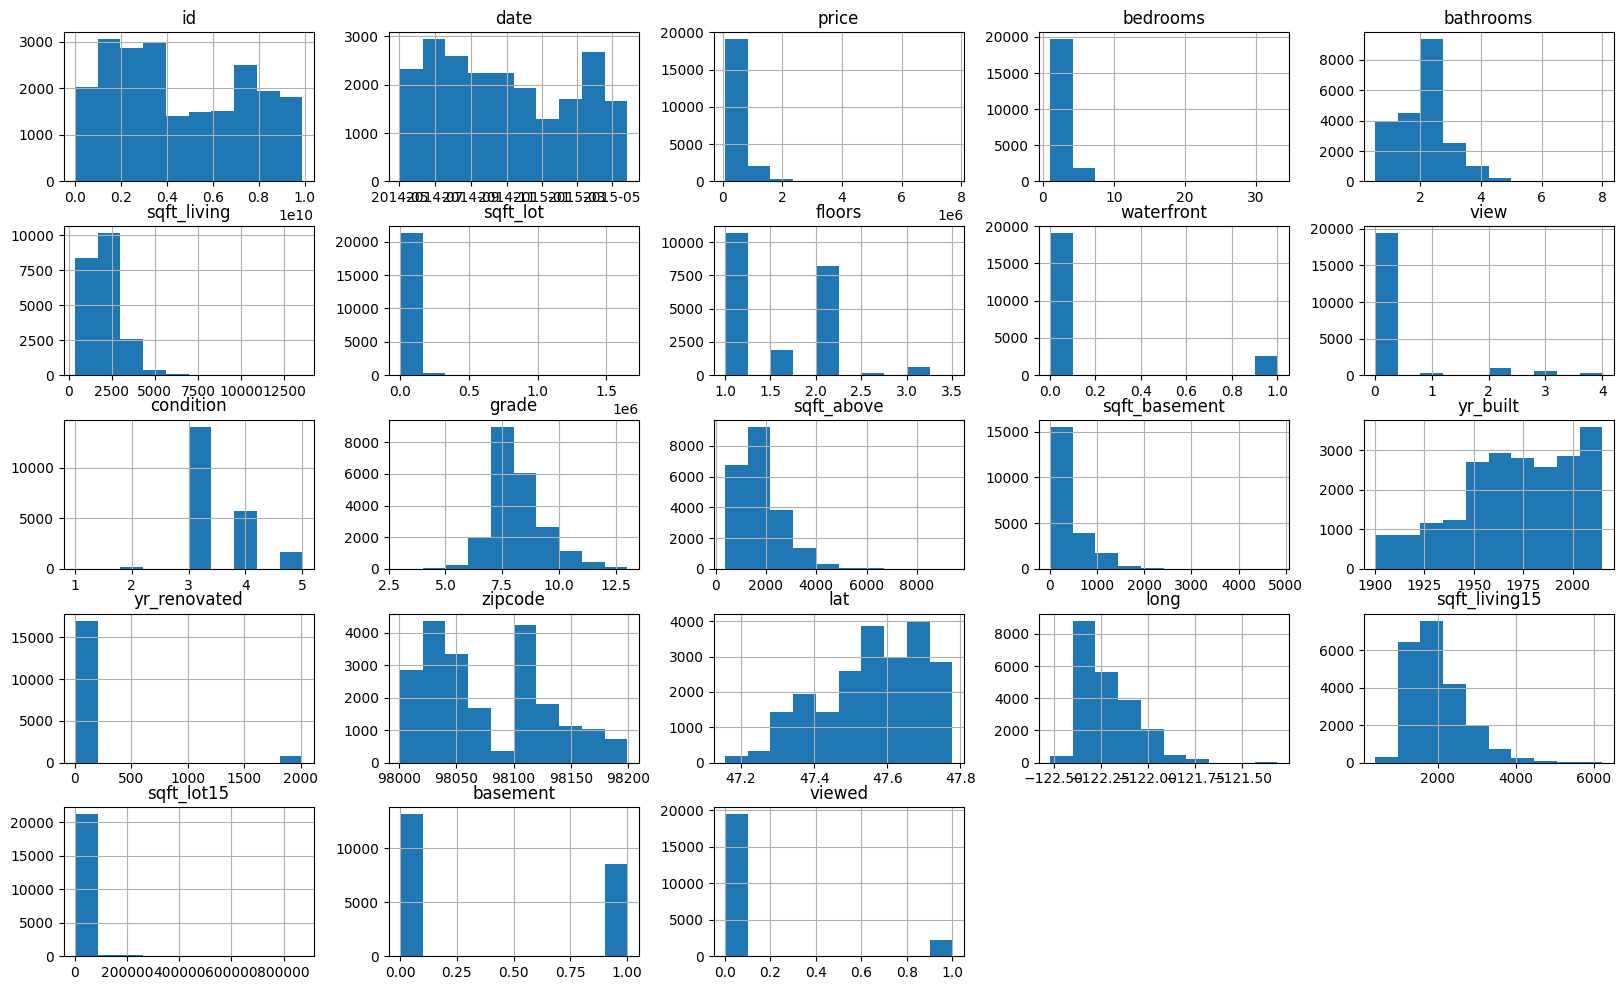

In [ ]:
#Viewing the distributions of all variables
df.hist(figsize=(20,12))
plt.show()

In [ ]:
new_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','viewed','grade','sqft_above','sqft_basement','lat','sqft_living15']]
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,1,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,47.6168,1800


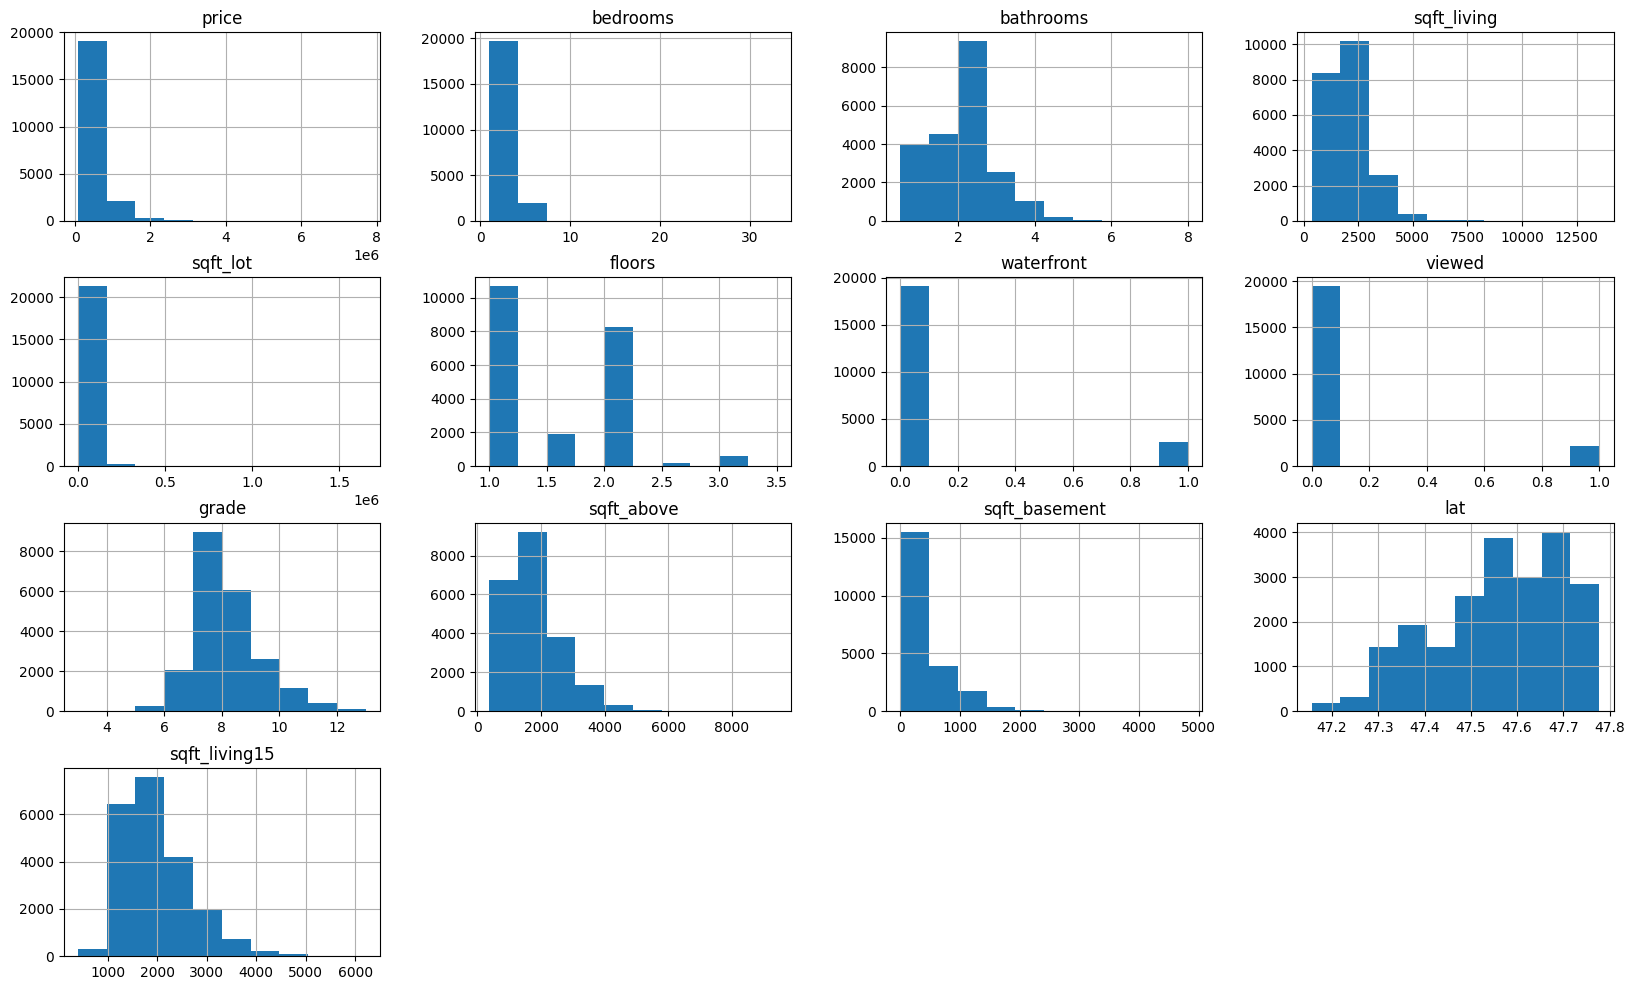

<Figure size 640x480 with 0 Axes>

In [ ]:
new_df.hist(figsize=(20,12))
plt.show()
plt.savefig('/content/download (2).png', dpi = 150)



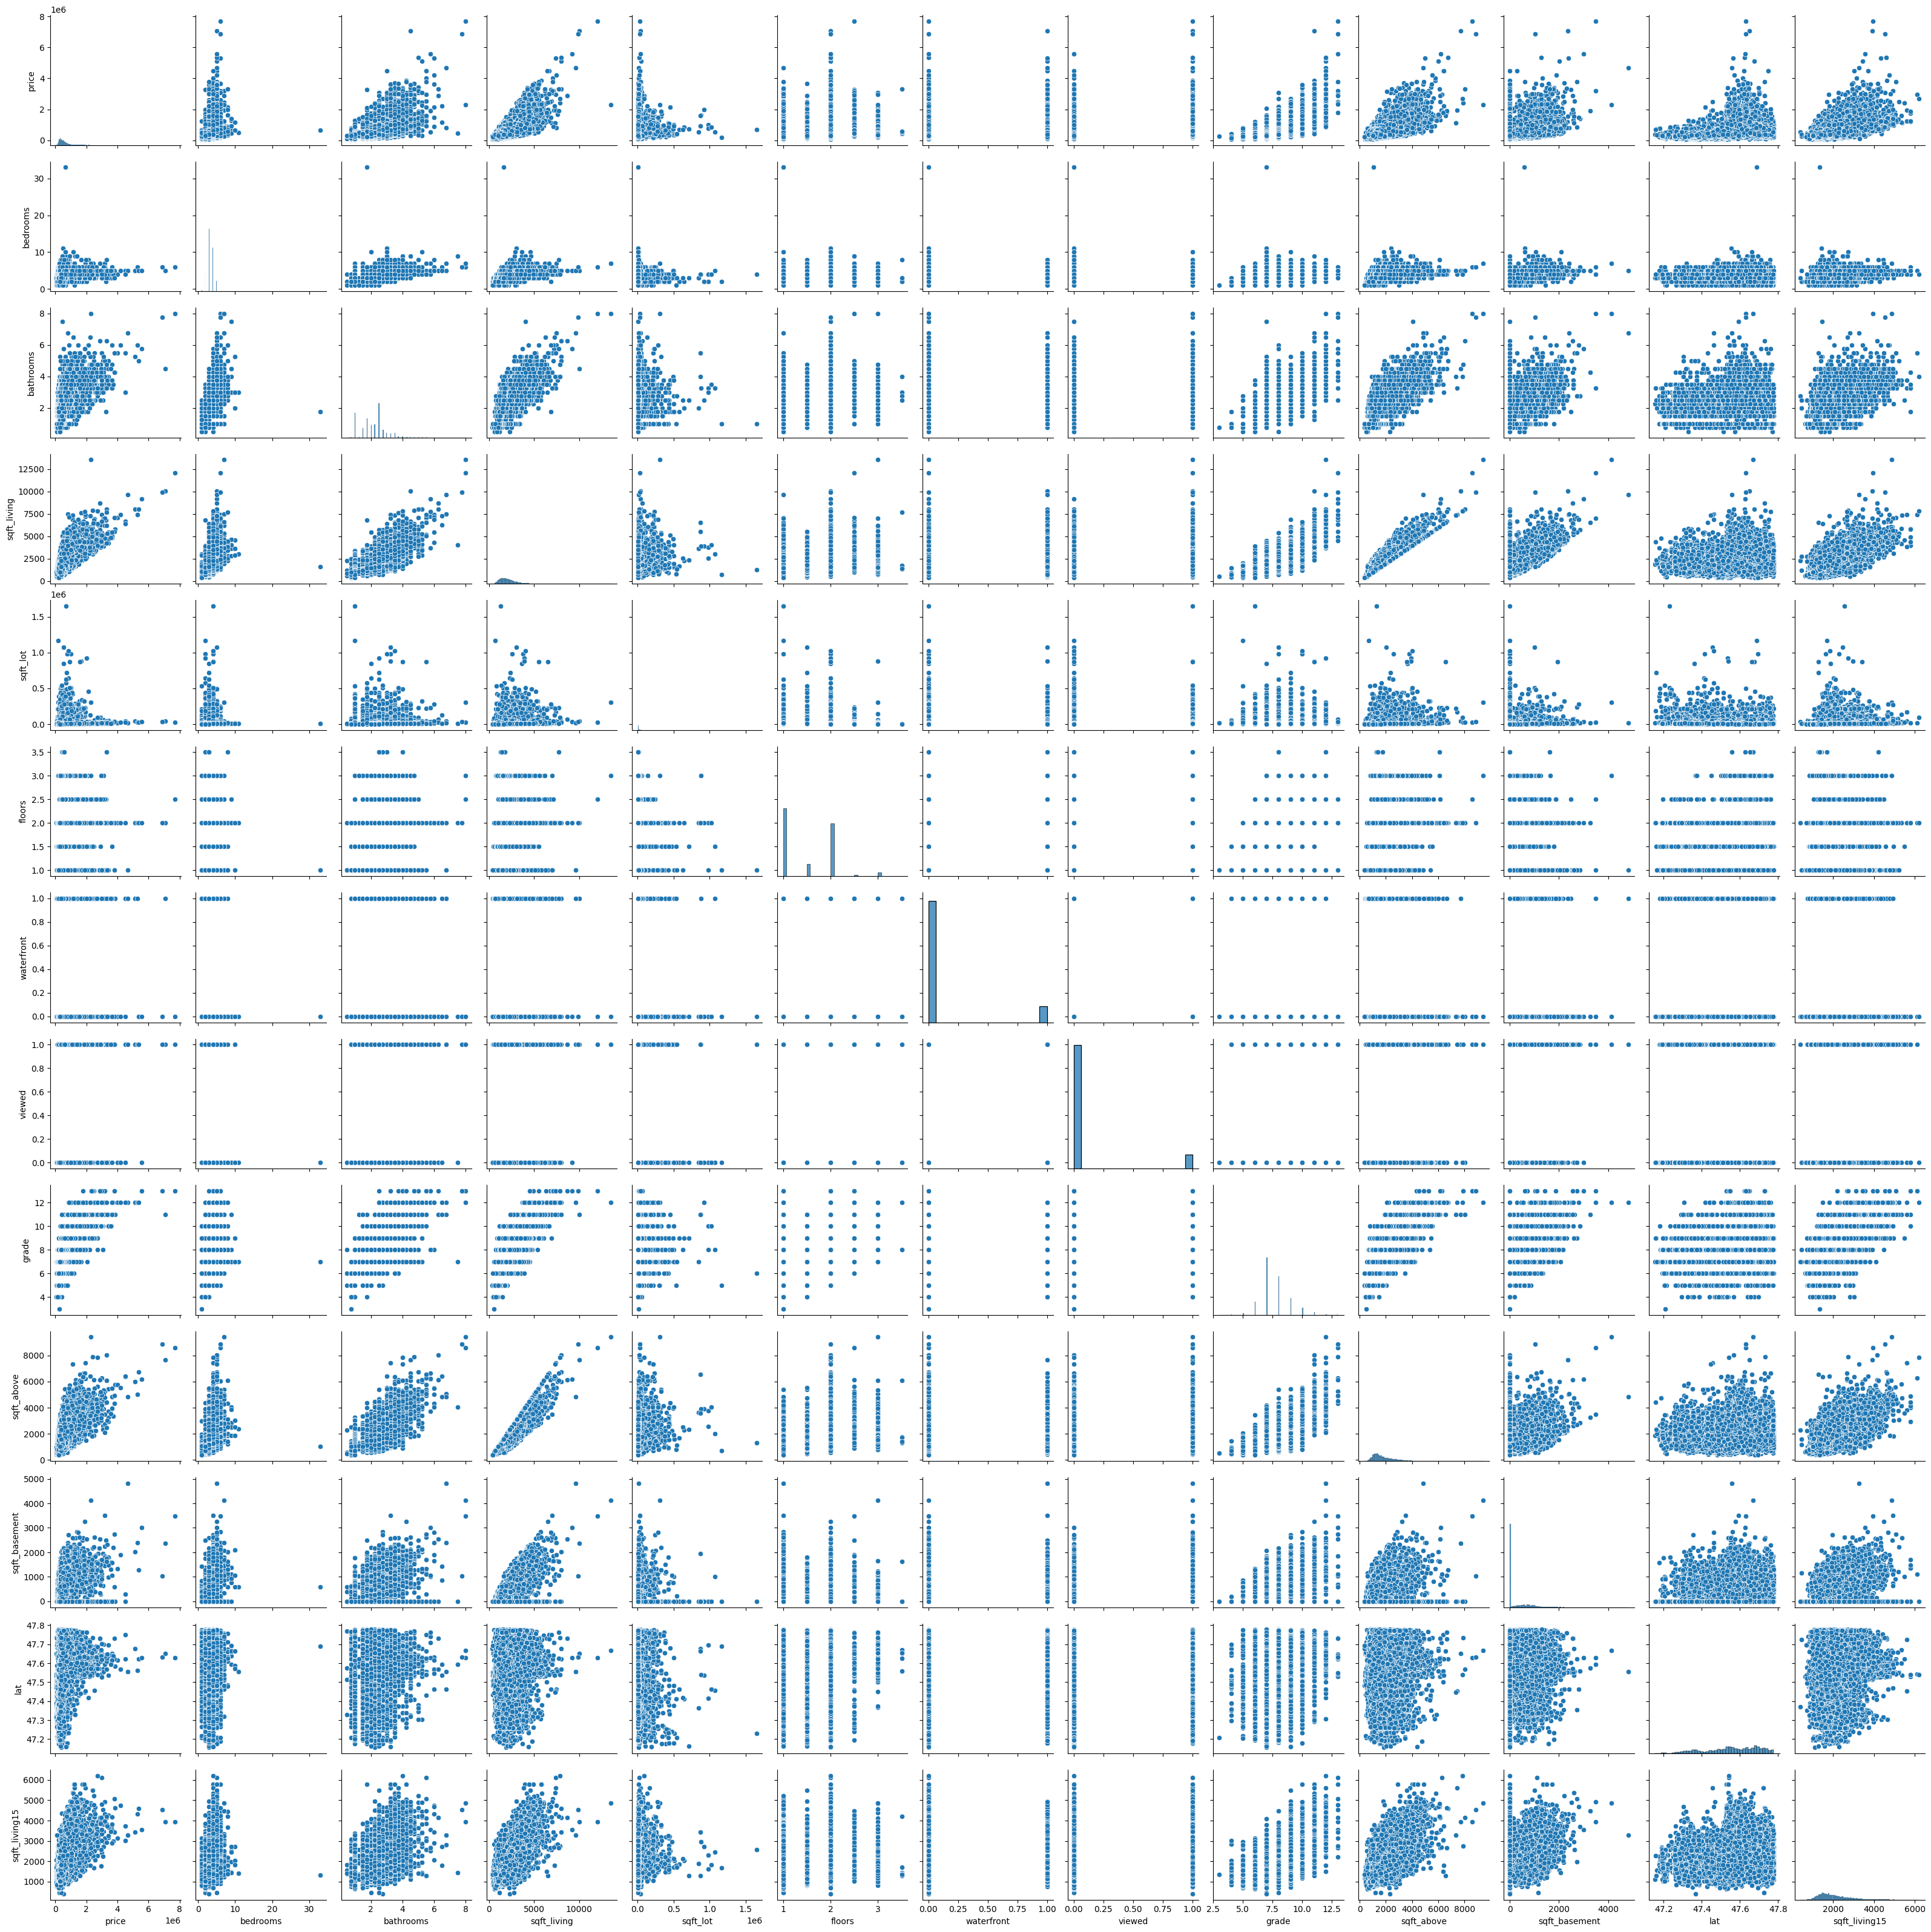

In [ ]:
#Viewing each feature paired against each other to view correlations and see trends
sns.pairplot(new_df)

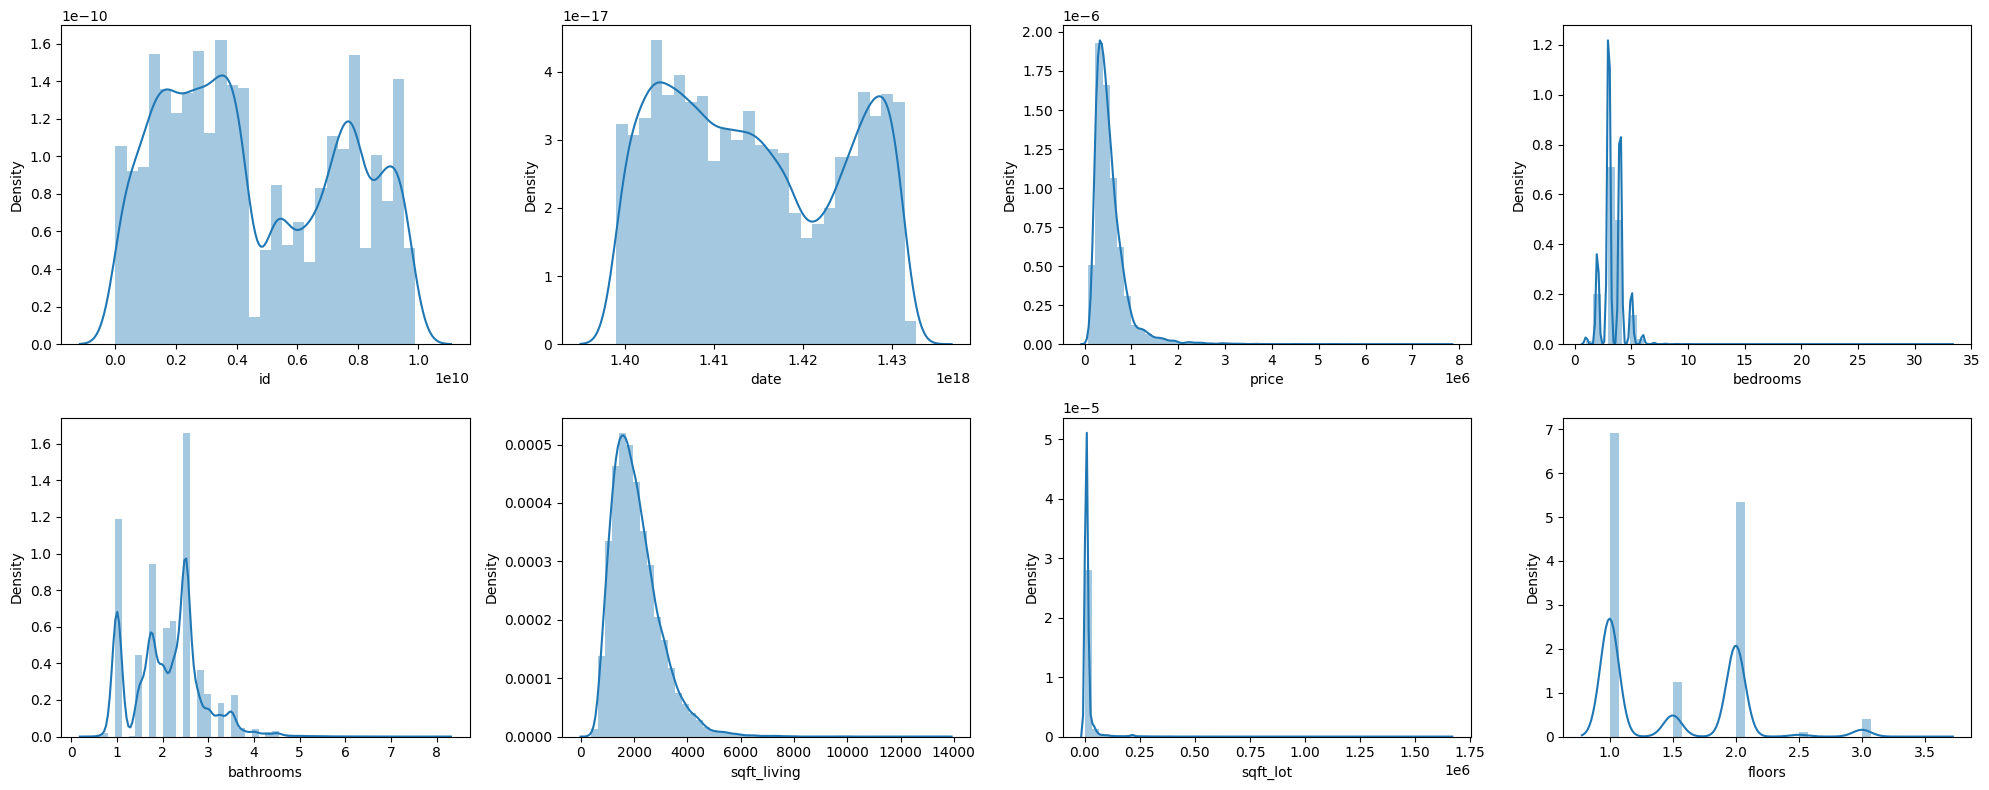

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Viewing the univariate distribution for each feature in the testing dataframe

#Creating variables for the number of rows and columns
rows = 2
cols = 4

#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,8))

#Iterating through each row and column of the testing dataframe
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [ ]:
corr = new_df.corr
corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.057305,0.353770,0.667951,0.605368,0.323799,0.306692,0.585241
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.004858,0.078782,0.356563,0.479386,0.302808,-0.009951,0.393406
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.011744,0.174090,0.665838,0.686668,0.283440,0.024280,0.569884
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.020362,0.266760,0.762779,0.876448,0.435130,0.052155,0.756402
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.007191,0.068035,0.114731,0.184139,0.015418,-0.085514,0.144763
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.000505,0.015920,0.458794,0.523989,-0.245715,0.049239,0.280102
waterfront,0.057305,-0.004858,0.011744,0.020362,0.007191,0.000505,1.000000,0.075702,0.013732,0.009043,0.025322,0.000291,0.018332
viewed,0.353770,0.078782,0.174090,0.266760,0.068035,0.015920,0.075702,1.000000,0.233579,0.150093,0.272605,0.007311,0.269870
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.013732,0.233579,1.000000,0.756073,0.168220,0.113575,0.713867
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.009043,0.150093,0.756073,1.000000,-0.052156,-0.001199,0.731767


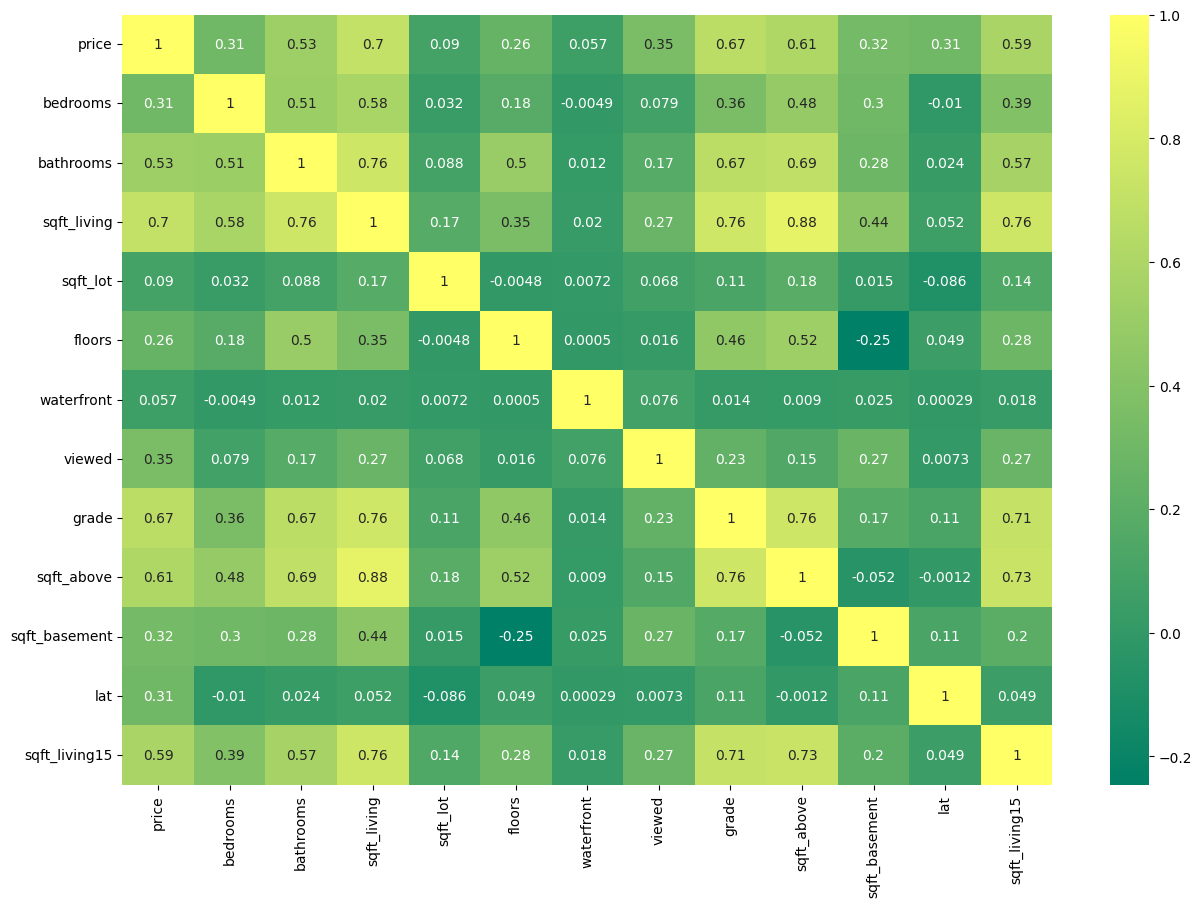

In [ ]:
def correlation_heatmap(dataframe):
    _,ax=plt.subplots(figsize=(15,10))
    sns.heatmap(dataframe.corr(),annot=True,cmap='summer')
     
correlation_heatmap(new_df)
plt.savefig('/content/download (1).png', dpi = 150)


In [ ]:
#fuction to retrive the correlated data at a certain threshold
def getcorrelationFeatures(corrdata, threshold):
    feature = []
    value = []
    
# If the absolute value of the correlated feature is above 
# the given threshold, the value and the feature will be appended 
# to a new list
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [ ]:
#Setting the threshold
threshold = 0.5

#The correlated features for price greater than 50%
corr_value = getcorrelationFeatures(corr()['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241


In [ ]:
#Creating a dataframe from the indices of the corr value
corr_data = df[corr_value.index]
corr_data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


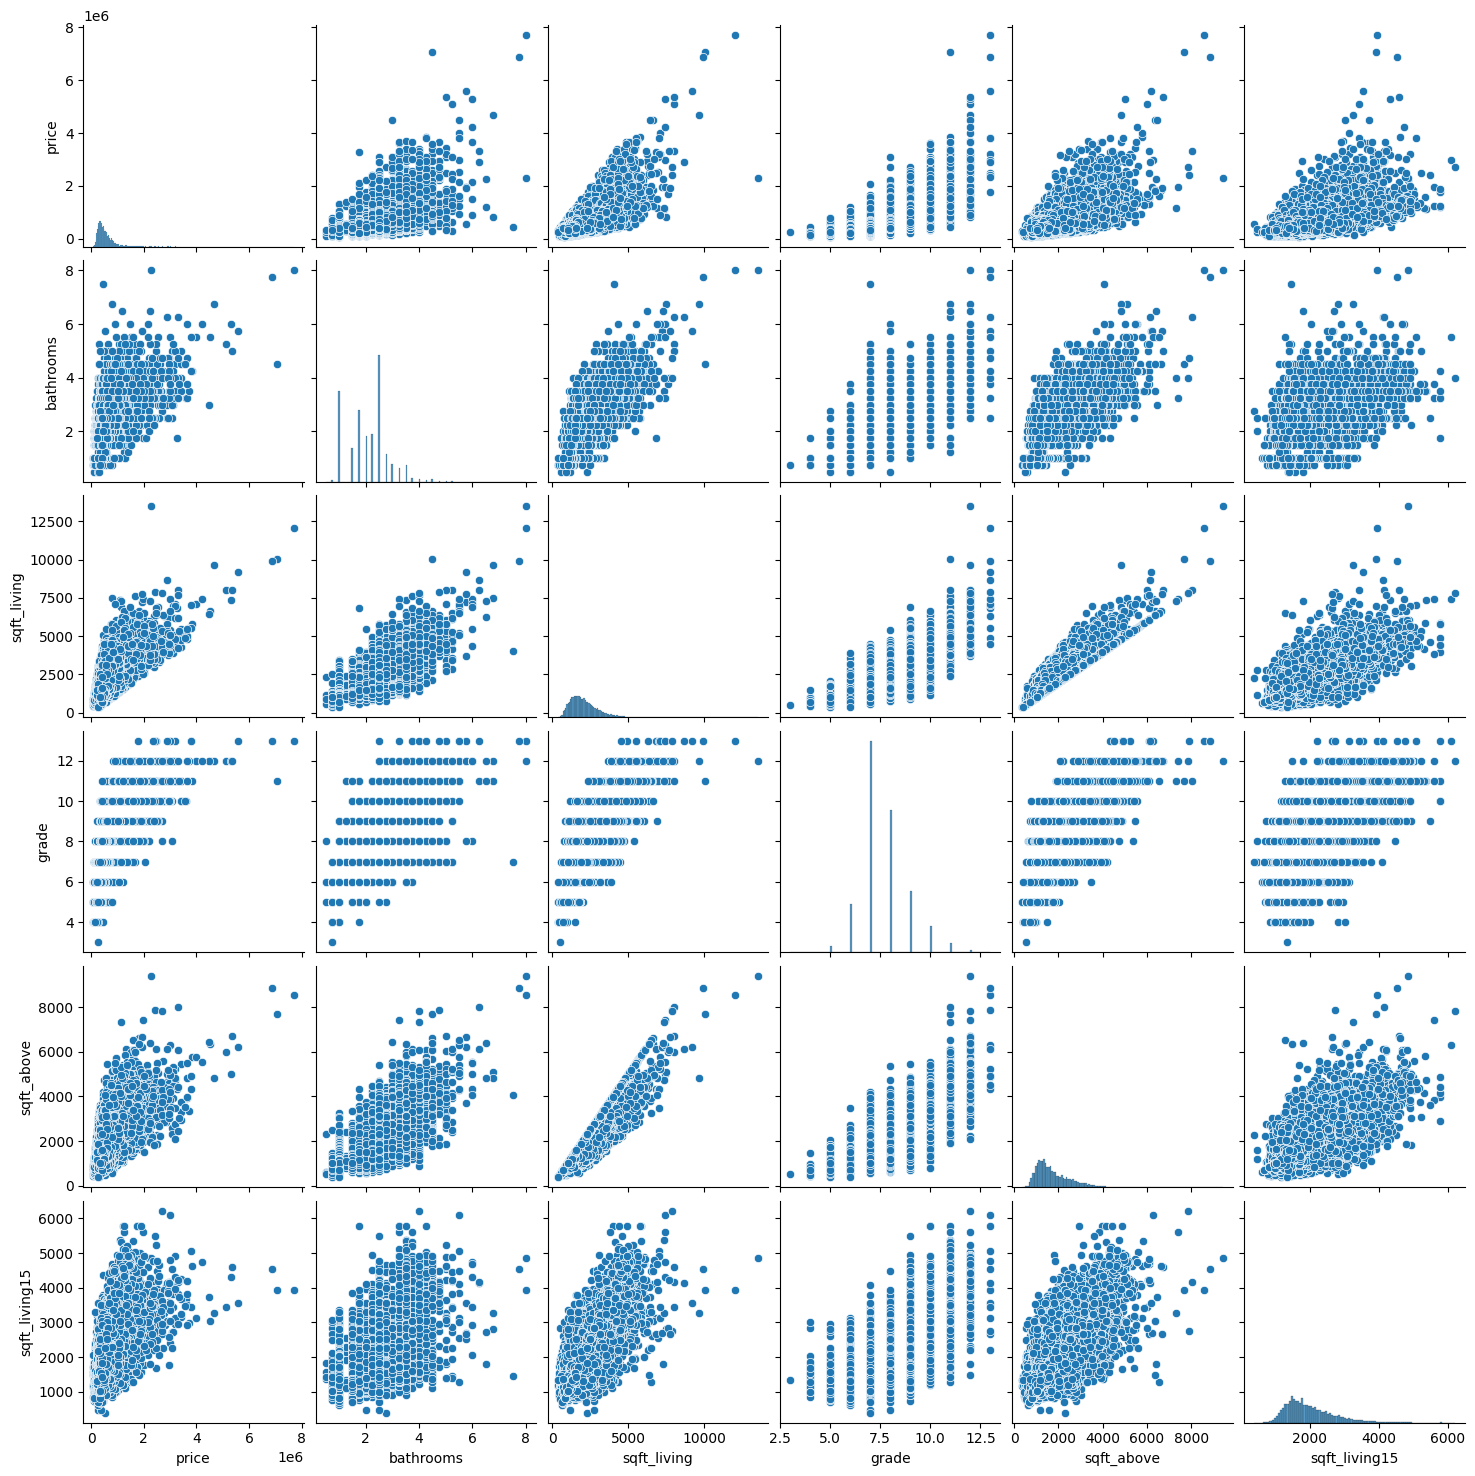

In [ ]:
sns.pairplot(corr_data)


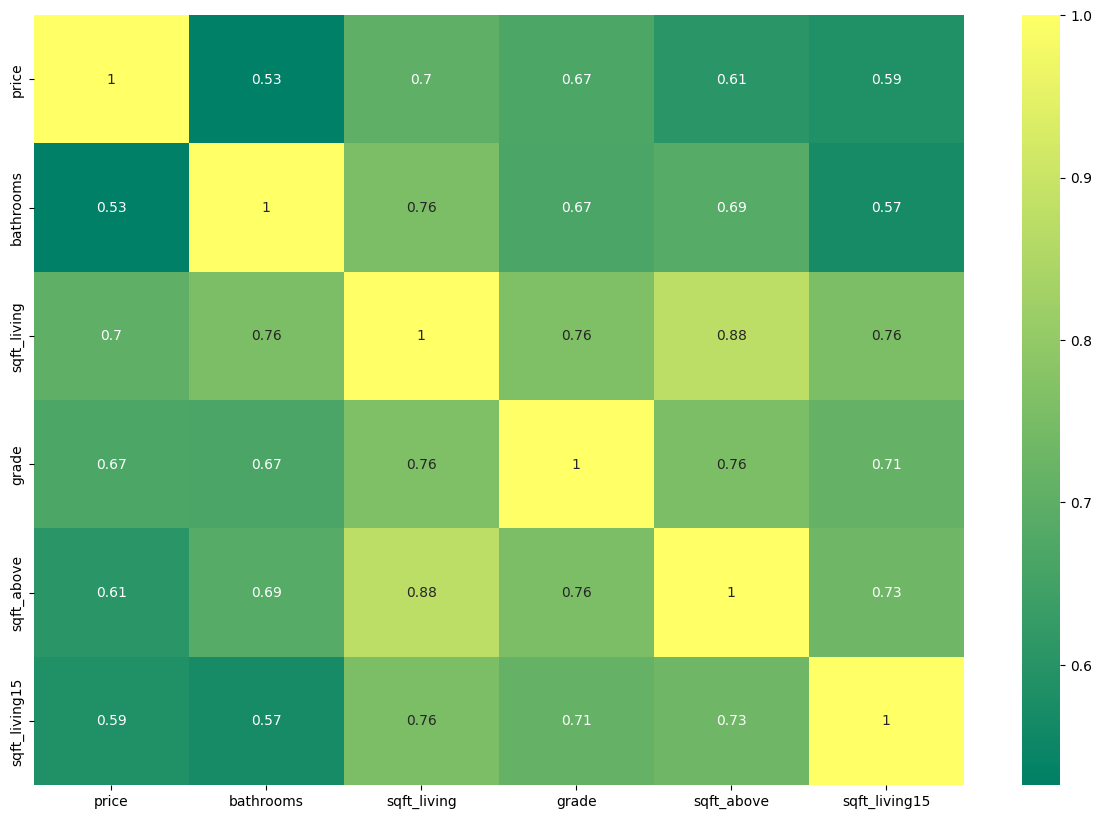

In [ ]:
correlation_heatmap(corr_data)


# **Simple** **Linear** **Regression**

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=42)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('MSE: ', round(np.sqrt(mean_squared_error),2))
print('R squared training: ',round(reg.score(x_train,y_train),3))
print('R sqUared testing: ',round(reg.score(x_test,y_test),3) )
print('intercept: ',reg.intercept_)
print('coefficient: ',reg.coef_)

Linear model
MSE:  256860.61
R squared training:  0.492
R sqUared testing:  0.493
intercept:  [-46447.34551807]
coefficient:  [[282.20150555]]


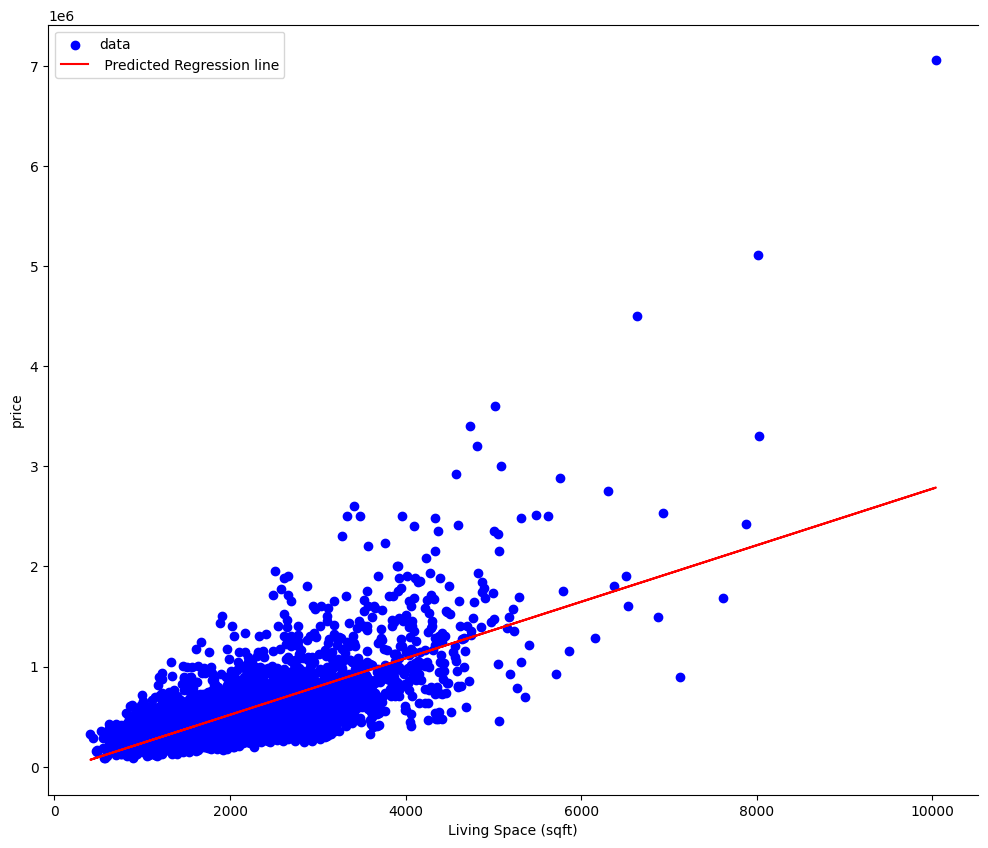

In [ ]:
fig, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'blue', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=15)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('MSE: ', round(np.sqrt(mean_squared_error),2))
print('R squared training: ',round(reg.score(x_train,y_train),3))
print('R sqUared testing: ',round(reg.score(x_test,y_test),3) )
print('intercept: ',reg.intercept_)
print('coefficient: ',reg.coef_)

Linear model
MSE:  271458.11
R squared training:  0.448
R sqUared testing:  0.44
intercept:  [-1063256.35535244]
coefficient:  [[209454.5616546]]


# **Multiple** **Regression**

<Axes: xlabel='bathrooms', ylabel='price'>

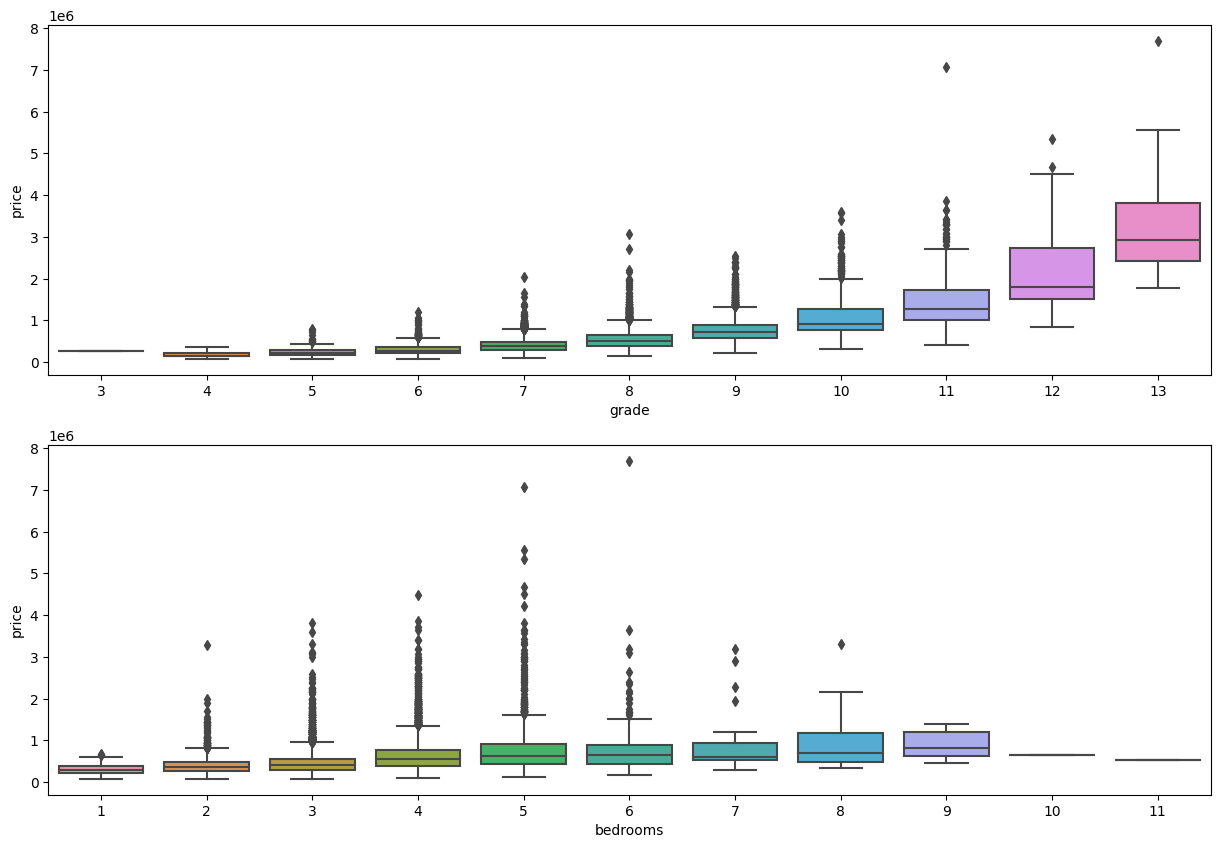

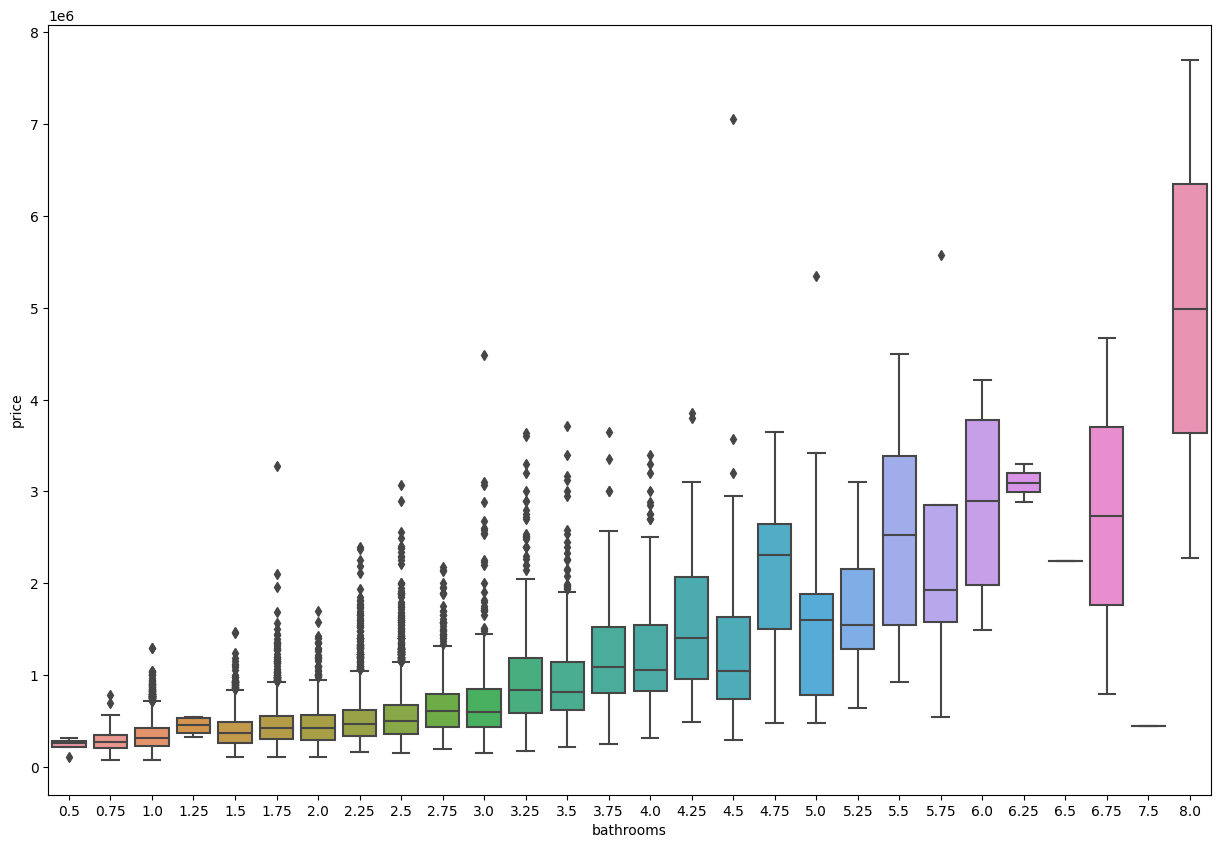

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
fig, axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [ ]:
select_features=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[select_features],train_data['price'])
pred=reg.predict(test_data[select_features])
print('MLG_1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('MSE: ', round(np.sqrt(mean_squared_error),2))
print('R squared training: ',round(reg.score(train_data[select_features],train_data['price']),3))
print('R squared testing: ', round(reg.score(test_data[select_features],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

MLG_1
MSE:  245449.1
R squared training:  0.551
R squared testing:  0.542
Intercept:  -514356.29086420825
Coefficient: [-4.70329453e+04  1.03536290e+05  2.68318096e+02 -7.69273301e+01]


In [ ]:
select_features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','viewed','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[select_features2],train_data['price'])
pred = reg.predict(test_data[select_features2])
print('MLG_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[select_features2], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[select_features2], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

MLG_2
Mean Squared Error (MSE)  221400.27
R-squared (training)  0.632
R-squared (testing)  0.627
Intercept:  -31629567.959833533
Coefficient: [-3.44355677e+04 -5.05971359e+03  1.38110077e+02 -1.66123405e-01
 -2.64470033e+04  3.56349581e+04  1.92303804e+05  8.19006629e+04
  6.87288588e+01  6.93812183e+01  6.57078311e+05  3.31019857e+00]


# **Polynomial** **Regression**

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[select_features2])
xtest_poly=polyfeat.fit_transform(test_data[select_features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_1')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE): ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training): ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing): ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_1
Mean Squared Error (MSE):  197943.16
R-squared (training):  0.737
R-squared (testing):  0.702


In [ ]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[select_features2])
xtest_poly=polyfeat.fit_transform(test_data[select_features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE): ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training): ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing): ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_2
Mean Squared Error (MSE):  197402.24
R-squared (training):  0.756
R-squared (testing):  0.704


# **Conclusion**

Complex Model_2 gives us R-squared (testing) score of 0.704. From above reports, we can conclude that Polynomial regression for degree=3 is the best solution.